In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats
from datetime import timedelta
from collections import Counter
#from warnings import filterwarnings
#filterwarnings('ignore')

#### Data loading and processing

In [2]:
data = pd.read_csv('royal_canin_sp_order_positions_pg_q1_and_q2_04092018.dsv', sep=';', low_memory=False)

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147594 entries, 0 to 147593
Data columns (total 34 columns):
SCM_N_ORDER_POS_NR              147594 non-null int64
SCM_N_ORDER_NR                  147594 non-null int64
TDT_T_KEY_ORDER_DATE            147594 non-null object
THR_C_KEY_ORDER_HOUR            147594 non-null object
SIT_N_KEY_SITE                  147594 non-null int64
CUS_N_KEY_CUSTOMER              147594 non-null int64
SCM_SALES_BMF                   147594 non-null object
SCM_SALES_CANCEL_BMF            147594 non-null object
SCM_D_FINANCE_CM1               147594 non-null object
SCM_D_FINANCE_CM2               147594 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    147594 non-null object
SCM_AP_ID                       147594 non-null int64
SCM_AS_ID                       147594 non-null int64
SCM_MASTER_AP_ID                147594 non-null int64
SCM_IS_ZSP_ORDER                147594 non-null int64
SCM_C_ORDER_STATUS              147594 non-null object
CTP_N_KEY_CUSTOME

In [4]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,PP_ID,PG_ID,PG4_PARENT_ID,PG3_PARENT_ID,PP_NAME,AP_SHORT_TEXT
0,439129985,102960853,21/01/2018 00:00,13:31,7,10289744,"24,99",0,"5,7729","2,4986",...,26/12/2018 23:59,152,8,"4,9",36702.0,1599.0,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm"
1,441361276,103481965,28/01/2018 00:00,23:39,7,6104684,"24,99",0,"5,6429","1,8617",...,15/11/2018 23:59,152,8,"4,9",36702.0,1599.0,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm"
2,483453172,113725396,28/06/2018 00:00,16:40,7,9282266,"3,49",0,"1,6143","1,0611",...,26/12/2018 23:59,152,8,"4,9",37204.0,914.0,47.0,4.0,Trixie ausziehbarer Spieltunnel für Frettchen,- ø 10 × 19/75 cm
3,463892437,108829030,16/04/2018 00:00,13:53,7,16515999,"7,49",0,"5,1701","4,3297",...,27/06/2018 23:59,152,8,"4,9",18503.0,215.0,47.0,4.0,Kletterbaum für Hamster,- 15 x 14 x 14 cm
4,439950958,103154180,23/01/2018 00:00,21:34,7,2757473,"24,99",0,"5,6429","4,5734",...,23/01/2019 23:59,152,8,"4,9",36702.0,1599.0,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm"


In [5]:
def get_date(x):
    return x.split(' ')[0]

In [6]:
data['TDT_T_KEY_ORDER_DATE'] = data['TDT_T_KEY_ORDER_DATE'].map(get_date)

In [7]:
%run -i cleaning_n_formatting.py

Duplicated rows detected:  1060
Start dropping..
Number of order IDs having more than one SP_START_DATE now:  0


In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146534 entries, 0 to 147593
Data columns (total 40 columns):
SCM_N_ORDER_POS_NR              146534 non-null int64
SCM_N_ORDER_NR                  146534 non-null int64
TDT_T_KEY_ORDER_DATE            146534 non-null datetime64[ns]
THR_C_KEY_ORDER_HOUR            146534 non-null object
SIT_N_KEY_SITE                  146534 non-null int64
CUS_N_KEY_CUSTOMER              146534 non-null int64
SCM_SALES_BMF                   146534 non-null float64
SCM_SALES_CANCEL_BMF            146534 non-null float64
SCM_D_FINANCE_CM1               146534 non-null float64
SCM_D_FINANCE_CM2               146534 non-null float64
SCM_D_ORIG_FINANCE_ORDER_NET    146534 non-null float64
SCM_AP_ID                       146534 non-null int64
SCM_AS_ID                       146534 non-null int64
SCM_MASTER_AP_ID                146534 non-null int64
SCM_IS_ZSP_ORDER                146534 non-null int64
SCM_C_ORDER_STATUS              146534 non-null object
CTP_

In [9]:
data.head(10)

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,PG4_PARENT_ID,PG3_PARENT_ID,PP_NAME,AP_SHORT_TEXT,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2
0,439129985,102960853,2018-01-21,13:31,7,10289744,24.99,0.0,5.7729,2.4986,...,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm",2018-01-21 13:31:00,3,1,25.6694,22.489423,9.733769
1,441361276,103481965,2018-01-28,23:39,7,6104684,24.99,0.0,5.6429,1.8617,...,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm",2018-01-28 23:39:00,4,1,26.5951,21.217818,7.000162
2,483453172,113725396,2018-06-28,16:40,7,9282266,3.49,0.0,1.6143,1.0611,...,47.0,4.0,Trixie ausziehbarer Spieltunnel für Frettchen,- ø 10 × 19/75 cm,2018-06-28 16:40:00,26,6,93.4712,1.727056,1.135216
3,463892437,108829030,2018-04-16,13:53,7,16515999,7.49,0.0,5.1701,4.3297,...,47.0,4.0,Kletterbaum für Hamster,- 15 x 14 x 14 cm,2018-04-16 13:53:00,16,4,35.6943,14.484385,12.129948
4,439950958,103154180,2018-01-23,21:34,7,2757473,24.99,0.0,5.6429,4.5734,...,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm",2018-01-23 21:34:00,4,1,40.1983,14.037658,11.377098
5,457019742,107178514,2018-03-22,16:30,7,16455058,7.98,0.0,3.0150,2.5416,...,47.0,4.0,Target Stick,- 1 Stück,2018-03-22 16:30:00,12,3,29.9916,10.052815,8.474373
6,472474517,110988419,2018-05-19,20:15,7,7889866,29.99,0.0,10.2351,8.8613,...,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm",2018-05-19 20:15:00,20,5,65.3636,15.658715,13.556934
7,464272219,108924125,2018-04-17,18:12,7,10476794,29.99,0.0,10.1351,8.3117,...,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm",2018-04-17 18:12:00,16,4,61.5537,16.465460,13.503169
8,452536377,106125471,2018-03-07,15:58,7,4221306,29.99,0.0,10.4251,9.3381,...,47.0,4.0,Kaninchentragetasche mit Freigehege,"- L 50 x B 54,5 x H 32 cm",2018-03-07 15:58:00,10,3,60.8098,17.143783,15.356242
9,447791830,104997420,2018-02-19,20:53,7,18486370,3.99,0.0,1.5075,1.0757,...,47.0,4.0,Target Stick,- 1 Stück,2018-02-19 20:53:00,8,2,53.7769,2.803248,2.000301


In [10]:
#Not equal to 0 means the value being cancelled
data['POS_VALID'] = (data['SCM_SALES_CANCEL_BMF'] == 0) * 1 

In [11]:
data[data['POS_VALID'] == 0][['SCM_SALES_BMF', 'SCM_SALES_CANCEL_BMF', 'SCM_D_ORIG_FINANCE_ORDER_NET']].sample(10)

,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_ORIG_FINANCE_ORDER_NET
18530,10.791,2.973,8.9182
85247,5.990,4.950,4.9504
69646,49.990,41.310,41.3140
89475,22.990,19.000,19.0000
49100,52.990,43.790,43.7934
127061,24.990,20.650,20.6529
114632,9.990,8.260,8.2562
471,17.990,14.870,14.8678
89154,25.980,24.510,24.5094
76067,1.390,1.150,1.1488


In [12]:
data['TAXES'] = data['SCM_SALES_BMF'] / data['SCM_D_ORIG_FINANCE_ORDER_NET']

In [13]:
data[['SCM_SALES_BMF', 'SCM_D_ORIG_FINANCE_ORDER_NET', 'TAXES']].sample(10)

,SCM_SALES_BMF,SCM_D_ORIG_FINANCE_ORDER_NET,TAXES
22411,2.99,2.4711,1.209987
144375,-3.19,-2.6364,1.209983
101677,2.99,2.4711,1.209987
14597,16.99,14.0413,1.210002
88921,22.99,19.0000,1.210000
141311,-2.65,-2.1901,1.209990
7385,5.99,4.9504,1.210003
94101,5.59,4.6198,1.210009
111330,-4.72,-3.9008,1.210008
65453,11.99,9.9091,1.209999


#### Gross sales, net sales

In [14]:
# Almost 2M € gross sales
np.round((data['SCM_SALES_BMF'] * data['POS_VALID']).sum(), 2)

1927670.29

In [15]:
# 1.6M € net sales
np.round(sum(data['SCM_D_ORIG_FINANCE_ORDER_NET'] * data['POS_VALID']), 2)

1596605.22

#### Revenue of SP sold

In [16]:
data[data['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].value_counts()

0.00    5642
4.90     730
4.99     311
1.90      10
Name: CZP_PRICE, dtype: int64

In [17]:
np.round(data[data['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].sum(), 2)

5147.89

#### SP discount

In [18]:
# 115K €
np.round(data[data['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'].sum(), 2)

-114916.81

#### How would it be in case we had brand specific SP where discounts only apply to Brand product groups?

In [19]:
data.columns

Index(['SCM_N_ORDER_POS_NR', 'SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE',
       'THR_C_KEY_ORDER_HOUR', 'SIT_N_KEY_SITE', 'CUS_N_KEY_CUSTOMER',
       'SCM_SALES_BMF', 'SCM_SALES_CANCEL_BMF', 'SCM_D_FINANCE_CM1',
       'SCM_D_FINANCE_CM2', 'SCM_D_ORIG_FINANCE_ORDER_NET', 'SCM_AP_ID',
       'SCM_AS_ID', 'SCM_MASTER_AP_ID', 'SCM_IS_ZSP_ORDER',
       'SCM_C_ORDER_STATUS', 'CTP_N_KEY_CUSTOMER_TYPE', 'SCM_OCI_LAND',
       'OSP_KO_COUNT_NET', 'OSP_3_LEAD_P_PG_ID', 'OSP_3_LEAD_P_PG_SHARE',
       'OSP_4_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_SHARE', 'CZP_START_DATE',
       'CZP_EXPIRY_DATE', 'CZP_ZTQ_ID', 'CZP_PERCENTAGE', 'CZP_PRICE', 'PP_ID',
       'PG_ID', 'PG4_PARENT_ID', 'PG3_PARENT_ID', 'PP_NAME', 'AP_SHORT_TEXT',
       'ORDER_DATETIME', 'WEEK_NUMBER', 'MONTH_NUMBER', 'FINANCE_ORDER_NET',
       'REL_CM1', 'REL_CM2', 'POS_VALID', 'TAXES'],
      dtype='object')

In [20]:
# Example
data[data['SCM_N_ORDER_NR'] == 108350020][['SCM_MASTER_AP_ID', 'SCM_SALES_BMF', 'SCM_D_FINANCE_CM1', 'SCM_D_FINANCE_CM2',
                                          'SCM_D_ORIG_FINANCE_ORDER_NET', 'PG3_PARENT_ID', 'PG4_PARENT_ID',
                                          'OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID', 'PP_NAME', 'AP_SHORT_TEXT']]

,SCM_MASTER_AP_ID,SCM_SALES_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,PG3_PARENT_ID,PG4_PARENT_ID,OSP_3_LEAD_P_PG_ID,OSP_4_LEAD_P_PG_ID,PP_NAME,AP_SHORT_TEXT
27772,23170,0.0000,0.0000,0.0000,0.0000,2430.0,9272.0,252,261925,Extra Bonuspunkte,- 100 Bonuspunkte extra
64427,6855,3.4900,1.5943,1.2422,2.8843,34.0,1559.0,252,261925,Trixie Katzenmalz,- 100 g
68935,54808,49.9900,6.6440,1.7810,41.3140,252.0,261925.0,252,261925,Royal Canin Maine Coon 31,- Maine Coon Adult 10 + 2 kg
74732,54607,0.0000,-0.3500,-0.6970,0.0000,3.0,34.0,252,261925,Catessy Knabber-Snack 65 g,Mit Geflügel & Käse
74733,65409,1.5548,0.4218,0.0658,1.2850,3.0,34.0,252,261925,Smilla Multi-Vitamin Katzenpaste,- 50 g
74734,65409,1.4352,0.3893,0.0607,1.1861,3.0,34.0,252,261925,Smilla Malt Katzenpaste,- 50 g
88366,79327,28.9900,8.8187,3.9976,23.9587,3.0,301.0,252,261925,PeeWee Wood Pellets,- 9kg
93569,32119,3.9900,1.0375,0.5292,3.2975,2068.0,2072.0,252,261925,Megapack Gourmet Perle 8 x 85 g,- Erlesene Streifen mit Gemüse
93570,69053,1.9900,0.4746,0.0662,1.6446,2068.0,2072.0,252,261925,MP/Megapack - Gourmet 4 x 85 g,- Duetto die Mare Fisch
101800,62414,2.9900,1.3911,1.0165,2.4711,36.0,2173.0,252,261925,Trixie Catnip-Spielspray,- 175 ml


+ Reverse the discount applying and get new sales value per order

In [21]:
data[data['SCM_N_ORDER_NR'] == 108350020]['SCM_SALES_BMF'][:11].sum()

94.42999999999999

In [22]:
data[data['SCM_N_ORDER_NR'] == 108350020]['SCM_SALES_BMF'][:12].sum()

89.71

In [23]:
data_without_sp_disc = data[~(data['SCM_MASTER_AP_ID'] == 42715)]

In [24]:
without_sp_disc = data_without_sp_disc.copy()

In [25]:
# Total sales value if there was no SP discount applying on these orders
np.round(sum(without_sp_disc['SCM_SALES_BMF'] * without_sp_disc['POS_VALID']), 2)

2042587.1

+ Locate the suitable products for the specific brand SP

In [26]:
# List every product group from Royal Canin...
rc_prod_groups = list(without_sp_disc[without_sp_disc['PP_NAME'].fillna('-').str.contains('Royal Canin')]['PP_NAME'].unique()) +\
                 list(without_sp_disc[without_sp_disc['PP_NAME'].fillna('-').str.contains('RC')]['PP_NAME'].unique())

In [27]:
rc_prod_groups

['Royal Canin Nutritional Supplement',
 'Royal Canin - Vet Diet Hypoallergenic',
 'Royal Canin Veterinary Diet Dog - Sensitive Control',
 'Royal Canin Vet Diet - Urinary S/O',
 'Royal Canin Vet Diet - Satiety Support weight management',
 'Royal Canin Veterinary Diet Dog - Gastro Intestinal',
 'Royal Canin Veterinary Diet Dog - Mobility C2P+',
 'Royal Canin Veterinary Diet Anallergenic',
 'Royal Canin Medium Light Weight Care',
 'Royal Canin Veterinary Diet Dog - Hepatic',
 'Royal Canin Veterinary Diet Dog - Obesity Mangement',
 'Royal Canin Veterinary Diet Fibre Response',
 'Royal Canin Veterinary Diet Dental Special Small',
 'Royal Canin Veterinary Diet Dog - Dental',
 'Royal Canin Veterinary Diet Dog - Renal RF 14',
 'Royal Canin - Vet Diet - Satiety Support',
 'Royal Canin Veterinary Diet Cat - Sensitivity Control',
 'Royal Canin Veterinary Diet Cat- Dental',
 'Royal Canin Veterinary Diet Mobility',
 'Royal Canin - Vet Diet - Hypoallergenic',
 'Royal Canin - Vet Diet - Obesity Manag

In [28]:
# Let's exclude from the list all products belonging to Veterinary Diets
included_rc_prods = [i for i in rc_prod_groups if 'Vet' not in i]

In [29]:
included_rc_prods

['Royal Canin Nutritional Supplement',
 'Royal Canin Medium Light Weight Care',
 'Royal Canin SHN Dose 195 g',
 'Royal Canin Breed Golden Retriever 29 Junior',
 'Royal Canin Breed Labrador Retriever 30',
 'Royal Canin Breed Shih Tzu 24 Adult',
 'Royal Canin Breed Chihuahua 28 Adult',
 'Royal Canin Breed Bulldog 24 Adult',
 'Royal Canin Breed Dachshund',
 'Royal Canin Breed French Bulldog 26 Adult',
 'Royal Canin Breed Dachshund 30 Junior',
 'Royal Canin French Bulldog',
 'Royal Canin Breed Deutscher Schäferhund 24',
 'Royal Canin Breed Cocker 25',
 'Royal Canin Breed Boxer 26',
 'Royal Canin Breed Boxer 30 Junior',
 'Royal Canin Breed Cavalier King Charles 27 Adult',
 'Royal Canin Breed Pug/ Mops 25 Adult',
 'Royal Canin Breed German Shepherd 30 Junior',
 'Royal Canin Breed Pug Junior',
 'Royal Canin Breed Cocker Junior',
 'Royal Canin Breed Labrador Retriever 33 Junior',
 'Royal Canin Breed Chihuahua 30 Junior',
 'Royal Canin Breed Sterilised Labrador Retriever Adult',
 'Royal Canin B

In [30]:
without_sp_disc['DISC_POS'] = (without_sp_disc['PP_NAME'].isin(included_rc_prods)) * 1

In [31]:
without_sp_disc[['PP_NAME', 'SCM_SALES_BMF', 'DISC_POS', 'CZP_PERCENTAGE']].sample(20)

,PP_NAME,SCM_SALES_BMF,DISC_POS,CZP_PERCENTAGE
82717,Cat Mate Trinkbrunnen,13.9900,0,5
90973,Greenwoods 100% Plant fibre natural clumping c...,5.9900,0,5
106688,Natur Stroh,7.9900,0,5
100592,Frontline spot-on (NL) Katze,20.9900,0,5
37583,Whiskas 1+ Megapack 12 x 100 g,24.9900,0,5
77725,Cosma Snackies Duo - 75% Hühnerbrust & 25% Thu...,0.0000,0,5
72578,Royal Canin Kitten Maine Coon 36,4.4900,1,5
104280,"Royal Canin Pouches, 85 g",34.9900,1,5
21667,Savings Plan,0.0000,0,5
6490,Federwedel,2.4900,0,5


+ Apply SP discount only on the suitable order positions

In [32]:
without_sp_disc['NEW_SALES_VALUE'] = without_sp_disc['SCM_SALES_BMF'] - \
((without_sp_disc['SCM_SALES_BMF'] * without_sp_disc['CZP_PERCENTAGE'] / 100) * without_sp_disc['DISC_POS'])

In [33]:
without_sp_disc[['PP_NAME', 'SCM_SALES_BMF', 'DISC_POS', 'CZP_PERCENTAGE', 'NEW_SALES_VALUE']].sample(20)

,PP_NAME,SCM_SALES_BMF,DISC_POS,CZP_PERCENTAGE,NEW_SALES_VALUE
16619,Royal Canin - Vet Diet Katze - Renal,34.9900,0,5,34.9900
6136,Federboa Katzenangel,1.5900,0,5,1.5900
21240,Savings Plan,0.0000,0,5,0.0000
26595,GimCat Superfood Dental Duo-Snacks 40 g,1.6900,0,5,1.6900
107639,SureFlap Mikrochip Katzenklappe,67.9900,0,5,67.9900
73884,Whiskas Knusper-Taschen,1.4900,0,5,1.4900
18998,Biokat´s Classic Fresh 3in1 Babypuderduft,11.9800,0,5,11.9800
138038,NaN,6.9900,0,5,6.9900
44575,Royal Canin Fit 32,14.9900,1,8,13.7908
51643,Royal Canin Kitten 36,14.9900,1,5,14.2405


In [34]:
without_sp_disc['BASKET_VALUE'] = (without_sp_disc['SCM_SALES_BMF'] * without_sp_disc['POS_VALID']).groupby(without_sp_disc['SCM_N_ORDER_NR']).transform('sum')

In [35]:
without_sp_disc['O_POS_SHARE'] = (without_sp_disc['SCM_SALES_BMF'] * without_sp_disc['POS_VALID']) / without_sp_disc['BASKET_VALUE']

In [36]:
data[data['SCM_N_ORDER_NR'] == 101550829]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,PP_NAME,AP_SHORT_TEXT,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES
53988,433251159,101550829,2018-01-01,02:49,7,10197386,49.99,0.0,7.9940,2.9740,...,Royal Canin Sensible 33,- 10 kg,2018-01-01 02:49:00,1,1,39.2479,20.367969,7.577475,1,1.210001
132801,433251160,101550829,2018-01-01,02:49,7,10197386,-2.50,0.0,-2.0661,-2.0661,...,NaN,NaN,2018-01-01 02:49:00,1,1,39.2479,-5.264231,-5.264231,1,1.210009


#### With new brand specific scenario...

##### Gross sales, net sales

In [37]:
# Almost 2M € gross sales
np.round(sum(without_sp_disc['NEW_SALES_VALUE'] * without_sp_disc['POS_VALID']), 2)

1981941.17

In [38]:
# 1.6M € net sales
np.round((without_sp_disc['NEW_SALES_VALUE'] / without_sp_disc['TAXES'] * without_sp_disc['POS_VALID']).sum(), 2)

1641660.75

##### Revenue of SP sold

In [39]:
without_sp_disc[without_sp_disc['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].value_counts()

0.00    5642
4.90     730
4.99     311
1.90      10
Name: CZP_PRICE, dtype: int64

In [40]:
np.round(without_sp_disc[without_sp_disc['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].sum(), 2)

5147.89

##### SP discount

In [41]:
# 59K €
np.round((without_sp_disc['SCM_SALES_BMF'] - without_sp_disc['NEW_SALES_VALUE']).sum(), 2)

60846.67

|  | Gross sales | Net sales | Revenue of SP sold | SP discount |
| --- | --- | --- | --- |
| OLD RC SP | 1927670 € | 1596605 € | 5148 € | 114917 € | 
| Brand-specific RC SP | 1981941 € | 1641661 € | 5148 € | 60847 € |
|Delta| 2.81% | 2.82% | 0% | -47.05% |

Deltas have been calculated like this: (new state - previous state) / previous state * 100

In [42]:
# Orders including Brand Specific Products
without_sp_disc[without_sp_disc['DISC_POS'] == 1]['SCM_N_ORDER_NR'].nunique()

22080

In [43]:
rc_orders = list(without_sp_disc[without_sp_disc['DISC_POS'] == 1]['SCM_N_ORDER_NR'].unique())

In [44]:
# All orders
without_sp_disc['SCM_N_ORDER_NR'].nunique()

33072

In [45]:
without_sp_disc.columns

Index(['SCM_N_ORDER_POS_NR', 'SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE',
       'THR_C_KEY_ORDER_HOUR', 'SIT_N_KEY_SITE', 'CUS_N_KEY_CUSTOMER',
       'SCM_SALES_BMF', 'SCM_SALES_CANCEL_BMF', 'SCM_D_FINANCE_CM1',
       'SCM_D_FINANCE_CM2', 'SCM_D_ORIG_FINANCE_ORDER_NET', 'SCM_AP_ID',
       'SCM_AS_ID', 'SCM_MASTER_AP_ID', 'SCM_IS_ZSP_ORDER',
       'SCM_C_ORDER_STATUS', 'CTP_N_KEY_CUSTOMER_TYPE', 'SCM_OCI_LAND',
       'OSP_KO_COUNT_NET', 'OSP_3_LEAD_P_PG_ID', 'OSP_3_LEAD_P_PG_SHARE',
       'OSP_4_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_SHARE', 'CZP_START_DATE',
       'CZP_EXPIRY_DATE', 'CZP_ZTQ_ID', 'CZP_PERCENTAGE', 'CZP_PRICE', 'PP_ID',
       'PG_ID', 'PG4_PARENT_ID', 'PG3_PARENT_ID', 'PP_NAME', 'AP_SHORT_TEXT',
       'ORDER_DATETIME', 'WEEK_NUMBER', 'MONTH_NUMBER', 'FINANCE_ORDER_NET',
       'REL_CM1', 'REL_CM2', 'POS_VALID', 'TAXES', 'DISC_POS',
       'NEW_SALES_VALUE', 'BASKET_VALUE', 'O_POS_SHARE'],
      dtype='object')

In [46]:
rc_orders_df = without_sp_disc[without_sp_disc['SCM_N_ORDER_NR'].isin(rc_orders)]

In [47]:
rc_ord_df = rc_orders_df.copy()

In [48]:
rc_ord_df.sample(10)

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES,DISC_POS,NEW_SALES_VALUE,BASKET_VALUE,O_POS_SHARE
55819,434940732,101964015,2018-01-06,21:42,7,17344688,45.980,0.0,7.9200,3.7982,...,1,48.6529,16.278577,7.806729,1,1.210000,1,43.68100,61.97,0.741972
20429,464725259,109036482,2018-04-19,12:36,7,8707483,4.990,0.0,4.1240,4.1240,...,4,41.8016,9.865651,9.865651,1,1.209990,0,4.99000,54.98,0.090760
51362,458280196,107464961,2018-03-26,21:57,7,17972078,49.990,0.0,6.1340,0.7340,...,3,53.3719,11.492939,1.375256,1,1.210001,1,47.49050,67.98,0.735363
58018,472758076,111057459,2018-05-21,09:42,7,8209984,4.490,0.0,1.3707,0.7188,...,5,36.6611,3.738840,1.960661,1,1.210014,1,4.26550,46.69,0.096166
110230,463559713,108747070,2018-04-15,13:02,7,16097584,-14.700,0.0,-12.1488,-12.1488,...,4,100.5536,-12.081915,-12.081915,1,1.209996,0,-14.70000,132.25,-0.111153
106982,463552300,108745374,2018-04-15,12:34,7,7351675,14.990,0.0,2.6684,0.5864,...,4,25.8926,10.305647,2.264740,1,1.210003,0,14.99000,32.98,0.454518
47328,478145954,112408603,2018-06-09,14:10,7,13736205,99.990,0.0,12.8964,7.6864,...,6,92.6282,13.922758,8.298121,1,1.209999,1,94.99050,117.98,0.847517
104015,469312788,110193687,2018-05-07,15:59,7,16804904,8.995,0.0,1.9139,1.1463,...,5,50.5125,3.788963,2.269339,1,1.209997,1,8.54525,64.34,0.139804
43237,481283535,113201215,2018-06-20,22:13,7,4681979,24.990,0.0,4.2829,1.9809,...,6,47.1157,9.090176,4.204331,1,1.210000,1,22.99080,61.97,0.403260
98877,453694455,106400464,2018-03-11,21:22,7,13115802,0.000,0.0,-0.6300,-0.9841,...,3,64.6530,-0.974433,-1.522126,1,NaN,0,0.00000,85.03,0.000000


In [49]:
rc_ord_df['RC_SHARE'] = (rc_ord_df['O_POS_SHARE'] * rc_ord_df['DISC_POS'] * rc_ord_df['POS_VALID']).groupby(rc_ord_df['SCM_N_ORDER_NR']).transform('sum')

In [50]:
rc_ord_df[rc_ord_df['SCM_N_ORDER_NR'] == 106256398]['PP_NAME']

11096               Pro Plan Small & Mini Adult Huhn & Reis
26881                           Spende für bedürftige Tiere
42659                             Royal Canin Exigent 35/30
42660                                Royal Canin Outdoor 30
42661                                    Royal Canin Fit 32
64130                        Gimpet Pudding für Katzen 150g
72717                            Catessy Knabber-Snack 65 g
72718     MP Catessy Katzenstick Bar-B-Q- mit Pute 10 x ...
78051                                Royal Canin Mini Adult
83241                              Hill's Canine Adult Mini
106787                        Hill's Feline Adult Thunfisch
106788                        Hill's Feline Adult Kaninchen
106789                             Hill's Feline Adult Lamm
106790                             Hill's Feline Adult Huhn
Name: PP_NAME, dtype: object

In [51]:
rc_ord_df[rc_ord_df['SCM_N_ORDER_NR'] == 106256398]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES,DISC_POS,NEW_SALES_VALUE,BASKET_VALUE,O_POS_SHARE,RC_SHARE
11096,453079576,106256398,2018-03-09,14:28,7,6140299,16.9900,0.0,3.1213,2.1230,...,97.2646,3.209081,2.182706,1,1.210002,0,16.9900,127.92,0.132817,0.609443
26881,453079580,106256398,2018-03-09,14:28,7,6140299,0.0000,0.0,0.0000,0.0000,...,97.2646,0.000000,0.000000,1,NaN,0,0.0000,127.92,0.000000,0.609443
42659,453079579,106256398,2018-03-09,14:28,7,6140299,15.9900,0.0,3.9949,3.1771,...,97.2646,4.107250,3.266450,1,1.209998,1,14.7108,127.92,0.125000,0.609443
42660,453079578,106256398,2018-03-09,14:28,7,6140299,26.9900,0.0,6.7758,5.5005,...,97.2646,6.966358,5.655192,1,1.209999,1,24.8308,127.92,0.210991,0.609443
42661,453079585,106256398,2018-03-09,14:28,7,6140299,23.9900,0.0,4.4564,3.1829,...,97.2646,4.581729,3.272414,1,1.210003,1,22.0708,127.92,0.187539,0.609443
64130,453079582,106256398,2018-03-09,14:28,7,6140299,0.0000,0.0,-0.7800,-1.1423,...,97.2646,-0.801936,-1.174425,1,NaN,0,0.0000,127.92,0.000000,0.609443
72717,453079581,106256398,2018-03-09,14:28,7,6140299,0.0000,0.0,-0.3500,-0.6957,...,97.2646,-0.359843,-0.715265,1,NaN,0,0.0000,127.92,0.000000,0.609443
72718,453079577,106256398,2018-03-09,14:28,7,6140299,0.9900,0.0,0.3982,0.0560,...,97.2646,0.409399,0.057575,1,1.209973,0,0.9900,127.92,0.007739,0.609443
78051,453079583,106256398,2018-03-09,14:28,7,6140299,10.9900,0.0,2.5226,1.7117,...,97.2646,2.593544,1.759839,1,1.210006,1,10.1108,127.92,0.085913,0.609443
83241,453079584,106256398,2018-03-09,14:28,7,6140299,13.9900,0.0,3.1620,2.2317,...,97.2646,3.250926,2.294463,1,1.209998,0,13.9900,127.92,0.109365,0.609443


In [52]:
rc_ord_df[rc_ord_df['SCM_N_ORDER_NR'] == 101550829]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES,DISC_POS,NEW_SALES_VALUE,BASKET_VALUE,O_POS_SHARE,RC_SHARE
53988,433251159,101550829,2018-01-01,02:49,7,10197386,49.99,0.0,7.994,2.974,...,39.2479,20.367969,7.577475,1,1.210001,1,47.4905,49.99,1.0,1.0


In [53]:
rc_ord_df.groupby('SCM_N_ORDER_NR')['RC_SHARE'].mean().describe()

count    22080.000000
mean         0.780789
std          0.246304
min          0.000000
25%          0.606989
50%          0.857453
75%          1.000000
max          1.471965
Name: RC_SHARE, dtype: float64

In [54]:
rc_ord_df.groupby('SCM_N_ORDER_NR')['RC_SHARE'].max().sort_values(ascending=False)

SCM_N_ORDER_NR
102210415    1.471965
104324338    1.471965
105287878    1.297729
107255367    1.263227
107144415    1.250125
108032647    1.250125
107113859    1.250063
107156724    1.250063
107155259    1.250063
107132855    1.250063
107125193    1.250063
108809050    1.250063
107975625    1.250063
107035653    1.250063
107112970    1.250063
107845238    1.250063
107103479    1.250063
107101970    1.250063
107096325    1.250063
107091516    1.250063
107087913    1.250063
107084566    1.250063
107079352    1.250063
107657180    1.250063
107166833    1.250063
107165077    1.250063
107425918    1.250063
107227581    1.250063
107227225    1.250063
107226470    1.250063
               ...   
103182701    0.000000
104707582    0.000000
101593220    0.000000
107974581    0.000000
107622981    0.000000
107128046    0.000000
103938987    0.000000
107163556    0.000000
103075559    0.000000
104823075    0.000000
107247385    0.000000
102796946    0.000000
108857279    0.000000
102769186    0.00

In [55]:
# Coupons seem to explain shares > 1

In [56]:
data[data['SCM_N_ORDER_NR'] == 102210415]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,PP_NAME,AP_SHORT_TEXT,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES
29041,435970514,102210415,2018-01-10,07:54,7,18668842,49.99,0.0,11.6440,6.8621,...,Royal Canin Breed Bulldog 24 Adult,- 12 kg,2018-01-10 07:54:00,2,1,41.5866,27.999404,16.500748,1,1.210001
47717,435970516,102210415,2018-01-10,07:54,7,18668842,16.99,0.0,4.8013,3.8781,...,Royal Canin Sterilised Appetite Control,- 2 kg,2018-01-10 07:54:00,2,1,41.5866,11.545305,9.325360,1,1.210002
78318,435970515,102210415,2018-01-10,07:54,7,18668842,10.99,0.0,3.2226,2.4519,...,Royal Canin X-Small Puppy,"- 1,5 kg",2018-01-10 07:54:00,2,1,41.5866,7.749131,5.895890,1,1.210006
119443,435970517,102210415,2018-01-10,07:54,7,18668842,-25.00,0.0,-20.6612,-20.6612,...,NaN,NaN,2018-01-10 07:54:00,2,1,41.5866,-49.682350,-49.682350,1,1.209997
119444,435970518,102210415,2018-01-10,07:54,7,18668842,-2.65,0.0,-2.1901,-2.1901,...,NaN,NaN,2018-01-10 07:54:00,2,1,41.5866,-5.266360,-5.266360,1,1.209990


In [57]:
rc_ord_df[rc_ord_df['SCM_N_ORDER_NR'] == 102210415][rc_ord_df.columns[5:15]]

,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER
29041,18668842,49.99,0.0,11.6440,6.8621,41.3140,61122,1308338,61122,0
47717,18668842,16.99,0.0,4.8013,3.8781,14.0413,61260,1301556,61260,0
78318,18668842,10.99,0.0,3.2226,2.4519,9.0826,61045,1306697,61045,0
119443,18668842,-25.00,0.0,-20.6612,-20.6612,-20.6612,0,1,6169,0


In [58]:
rc_ord_df[rc_ord_df['SCM_N_ORDER_NR'] == 107091516][rc_ord_df.columns[5:15]]

,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER
67226,3663598,49.99,0.0,6.5740,1.5240,41.3140,61298,1313584,61298,0
110785,3663598,-10.00,0.0,-8.2645,-8.2645,-8.2645,0,1,6169,0


In [59]:
# 615 orders with RC shares > 1 
sum(rc_ord_df.groupby('SCM_N_ORDER_NR')['RC_SHARE'].mean() > 1)

615

In [60]:
data[data['SCM_N_ORDER_NR'] == 103182701]  

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,PP_NAME,AP_SHORT_TEXT,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES
21770,440075147,103182701,2018-01-24,11:27,7,7684935,0.00,0.00,0.0000,0.0000,...,Savings Plan,- Savings Plan,2018-01-24 11:27:00,4,1,56.5124,0.000000,0.000000,1,NaN
27993,440075149,103182701,2018-01-24,11:27,7,7684935,0.00,0.00,0.0000,0.0000,...,Extra Bonuspunkte,- 100 Bonuspunkte extra,2018-01-24 11:27:00,4,1,56.5124,0.000000,0.000000,1,NaN
37630,440075148,103182701,2018-01-24,11:27,7,7684935,21.99,0.00,2.1236,-0.3337,...,Whiskas MP 84 x 100 g,- 1+ Geflügelauswahl in Sauce,2018-01-24 11:27:00,4,1,56.5124,3.757759,-0.590490,1,1.209997
69597,440075150,103182701,2018-01-24,11:27,7,7684935,49.99,41.31,3.6640,0.3413,...,Royal Canin Maine Coon 31,- Maine Coon Adult 10 + 2 kg,2018-01-24 11:27:00,4,1,56.5124,6.483533,0.603938,0,1.210001
127542,440075146,103182701,2018-01-24,11:27,7,7684935,0.00,0.00,0.0000,0.0000,...,NaN,NaN,2018-01-24 11:27:00,4,1,56.5124,0.000000,0.000000,1,NaN
127543,440075151,103182701,2018-01-24,11:27,7,7684935,-3.60,0.00,-2.9752,-2.9752,...,NaN,NaN,2018-01-24 11:27:00,4,1,56.5124,-5.264685,-5.264685,1,1.210003


In [61]:
rc_ord_df[rc_ord_df['SCM_N_ORDER_NR'] == 103182701]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES,DISC_POS,NEW_SALES_VALUE,BASKET_VALUE,O_POS_SHARE,RC_SHARE
21770,440075147,103182701,2018-01-24,11:27,7,7684935,0.00,0.00,0.0000,0.0000,...,56.5124,0.000000,0.000000,1,NaN,0,0.0000,21.99,0.0,0.0
27993,440075149,103182701,2018-01-24,11:27,7,7684935,0.00,0.00,0.0000,0.0000,...,56.5124,0.000000,0.000000,1,NaN,0,0.0000,21.99,0.0,0.0
37630,440075148,103182701,2018-01-24,11:27,7,7684935,21.99,0.00,2.1236,-0.3337,...,56.5124,3.757759,-0.590490,1,1.209997,0,21.9900,21.99,1.0,0.0
69597,440075150,103182701,2018-01-24,11:27,7,7684935,49.99,41.31,3.6640,0.3413,...,56.5124,6.483533,0.603938,0,1.210001,1,47.4905,21.99,0.0,0.0
127542,440075146,103182701,2018-01-24,11:27,7,7684935,0.00,0.00,0.0000,0.0000,...,56.5124,0.000000,0.000000,1,NaN,0,0.0000,21.99,0.0,0.0


In [62]:
data[data['SCM_N_ORDER_NR'] == 109645574]  

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,PP_NAME,AP_SHORT_TEXT,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES
1193,467139321,109645574,2018-04-29,11:51,7,17997499,4.99,0.00,2.4440,2.0852,...,Katzenspielzeug Insekt,- 3 Stück,2018-04-29 11:51:00,17,4,43.3141,5.642504,4.814137,1,1.209990
42826,467139322,109645574,2018-04-29,11:51,7,17997499,51.98,42.96,9.1587,4.3614,...,Royal Canin Kitten Sterilised,- 4 kg,2018-04-29 11:51:00,17,4,43.3141,21.144847,10.069238,0,1.209999
109573,467139323,109645574,2018-04-29,11:51,7,17997499,-4.56,0.00,-3.7686,-3.7686,...,NaN,NaN,2018-04-29 11:51:00,17,4,43.3141,-8.700631,-8.700631,1,1.209998


In [63]:
rc_ord_df[rc_ord_df['SCM_N_ORDER_NR'] == 109645574]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,FINANCE_ORDER_NET,REL_CM1,REL_CM2,POS_VALID,TAXES,DISC_POS,NEW_SALES_VALUE,BASKET_VALUE,O_POS_SHARE,RC_SHARE
1193,467139321,109645574,2018-04-29,11:51,7,17997499,4.99,0.00,2.4440,2.0852,...,43.3141,5.642504,4.814137,1,1.209990,0,4.9900,4.99,1.0,0.0
42826,467139322,109645574,2018-04-29,11:51,7,17997499,51.98,42.96,9.1587,4.3614,...,43.3141,21.144847,10.069238,0,1.209999,1,47.8216,4.99,0.0,0.0


In [64]:
# 54 orders with RC share = 0 because of RC prods have been cancelled
sum(rc_ord_df.groupby('SCM_N_ORDER_NR')['RC_SHARE'].mean() == 0)    

54

In [65]:
#Let's exclude them
rc_ord_sample = rc_ord_df[(rc_ord_df['RC_SHARE'] > 0) & (rc_ord_df['RC_SHARE'] <= 1)]

In [66]:
rc_ord_sample['SCM_N_ORDER_NR'].nunique()

21411

In [67]:
rc_sample = rc_ord_sample.copy()

In [68]:
brand_share = rc_sample.groupby('SCM_N_ORDER_NR')['RC_SHARE'].mean()

In [69]:
rc_sample['CM2'] = rc_sample['SCM_D_FINANCE_CM2'] * rc_sample['POS_VALID']

In [70]:
cm2 = rc_sample.groupby('SCM_N_ORDER_NR')['CM2'].sum()

In [71]:
rc_sample['NET_SALES'] = rc_sample['SCM_D_ORIG_FINANCE_ORDER_NET'] * rc_sample['POS_VALID']

In [72]:
net_sales = rc_sample.groupby('SCM_N_ORDER_NR')['NET_SALES'].sum()

In [73]:
df = pd.concat([brand_share, cm2, net_sales], axis=1)

In [74]:
df['CM2%'] = df['CM2'] / df['NET_SALES'] * 100

In [75]:
df.sample(5)

,RC_SHARE,CM2,NET_SALES,CM2%
SCM_N_ORDER_NR,,,,
109591356,1.000000,8.9314,57.8348,15.442951
111362194,0.683677,6.4252,67.1345,9.570638
105210465,0.579482,7.8054,104.0826,7.499236
107269252,0.615503,-3.6263,77.0598,-4.705826
113372743,1.000000,0.5598,26.4297,2.118072


In [76]:
df['CM2%'].describe()

count    21411.000000
mean        10.005556
std          7.492245
min        -38.309124
25%          5.248889
50%         10.138351
75%         14.713619
max         54.338134
Name: CM2%, dtype: float64

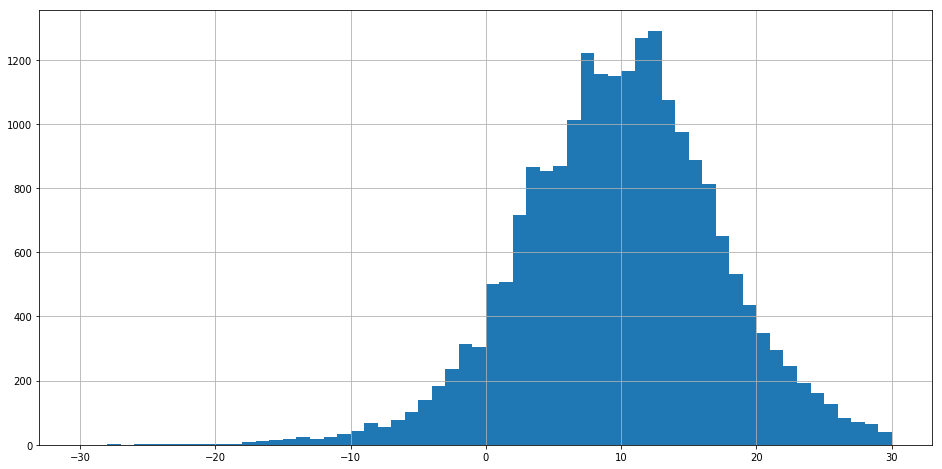

In [77]:
plt.figure(figsize=(16,8))
plt.hist(df['CM2%'], bins=60, range=(-30, 30))
plt.grid()

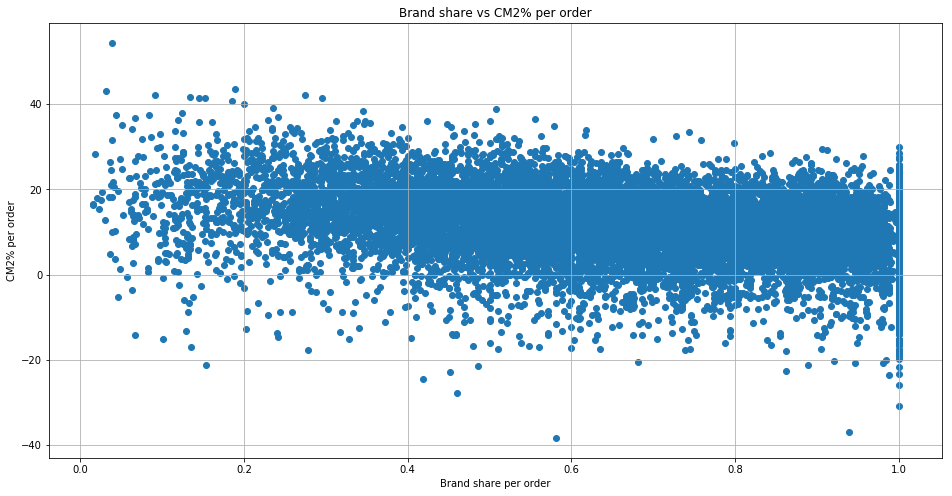

In [78]:
plt.figure(figsize=(16, 8))
plt.scatter(df['RC_SHARE'], df['CM2%'])
plt.title('Brand share vs CM2% per order')
plt.xlabel('Brand share per order')
plt.ylabel('CM2% per order')
plt.grid()

In [79]:
df_rc_share_20 = df[df['RC_SHARE'] > 0.20]
df_rc_share_40 = df[df['RC_SHARE'] > 0.40]
df_rc_share_60 = df[df['RC_SHARE'] > 0.60]
df_rc_share_80 = df[df['RC_SHARE'] > 0.80]

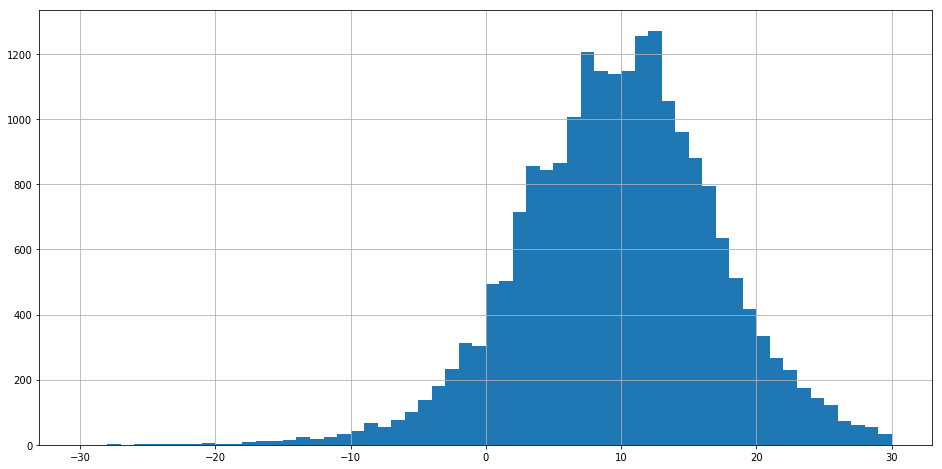

In [80]:
plt.figure(figsize=(16,8))
plt.hist(df_rc_share_20['CM2%'], bins=60, range=(-30, 30))
plt.grid()

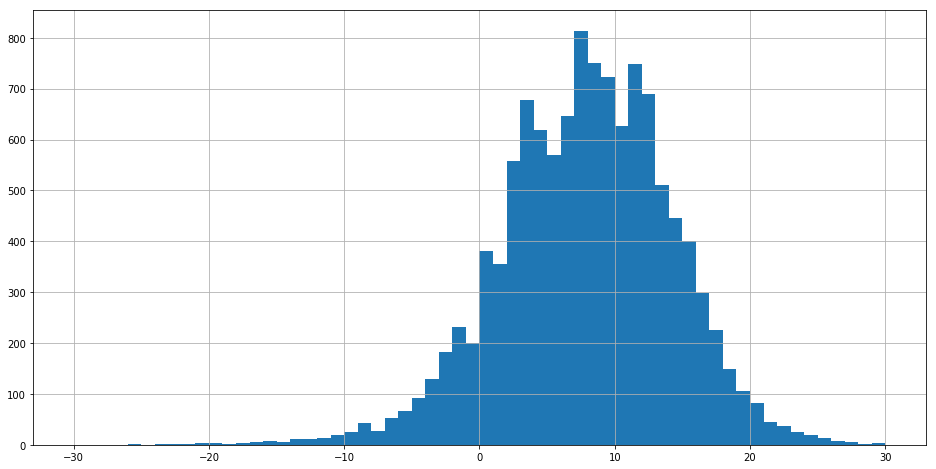

In [81]:
plt.figure(figsize=(16,8))
plt.hist(df_rc_share_80['CM2%'], bins=60, range=(-30, 30))
plt.grid()